In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

with open("../code/configuration.json", "r") as file:
    config1 = json.load(file, )

for key, value in zip(config1.keys(), config1.values()):
    print(f"{key:<30s}", f"{value:>}")

colnames = ["time"] + [f"col{col_num:04d}" for col_num in range(1, config1["Nx"]+2)]
df_output_sol_u = pd.read_csv(f"output_sol_u_{config1['run_num']}.csv", header=None, names=colnames)
df_output_sol_dens = pd.read_csv(f"output_sol_dens_{config1['run_num']}.csv", header=None, names=colnames)
df_output_sol_temp = pd.read_csv(f"output_sol_temp_{config1['run_num']}.csv", header=None, names=colnames)
df_output_sol_pres = pd.read_csv(f"output_sol_pres_{config1['run_num']}.csv", header=None, names=colnames)

u_vel = df_output_sol_u.iloc[:, 1:(config1["Nx"]+1)].values
dens = df_output_sol_dens.iloc[:, 1:(config1["Nx"]+1)].values
temp = df_output_sol_temp.iloc[:, 1:(config1["Nx"]+1)].values
pres = df_output_sol_pres.iloc[:, 1:(config1["Nx"]+1)].values

data_folder01                  ../data/cantera_files/
outputs_folder01               ../postprocessing/
run_num                        022
float_precision                32
boundary_mode                  1
left_boundary_dirichlet        10.0
right_boundary_dirichlet       20.0
left_boundary_neumann          30.0
right_boundary_neumann         40.0
init_temp                      300.0
init_pres                      101325.0
Nx                             128
domain_length                  1.0
timestep                       5e-09
n_iters_total                  100000
n_iters_save                   1000
scheme_to_use                  RK2
case_problem                   1


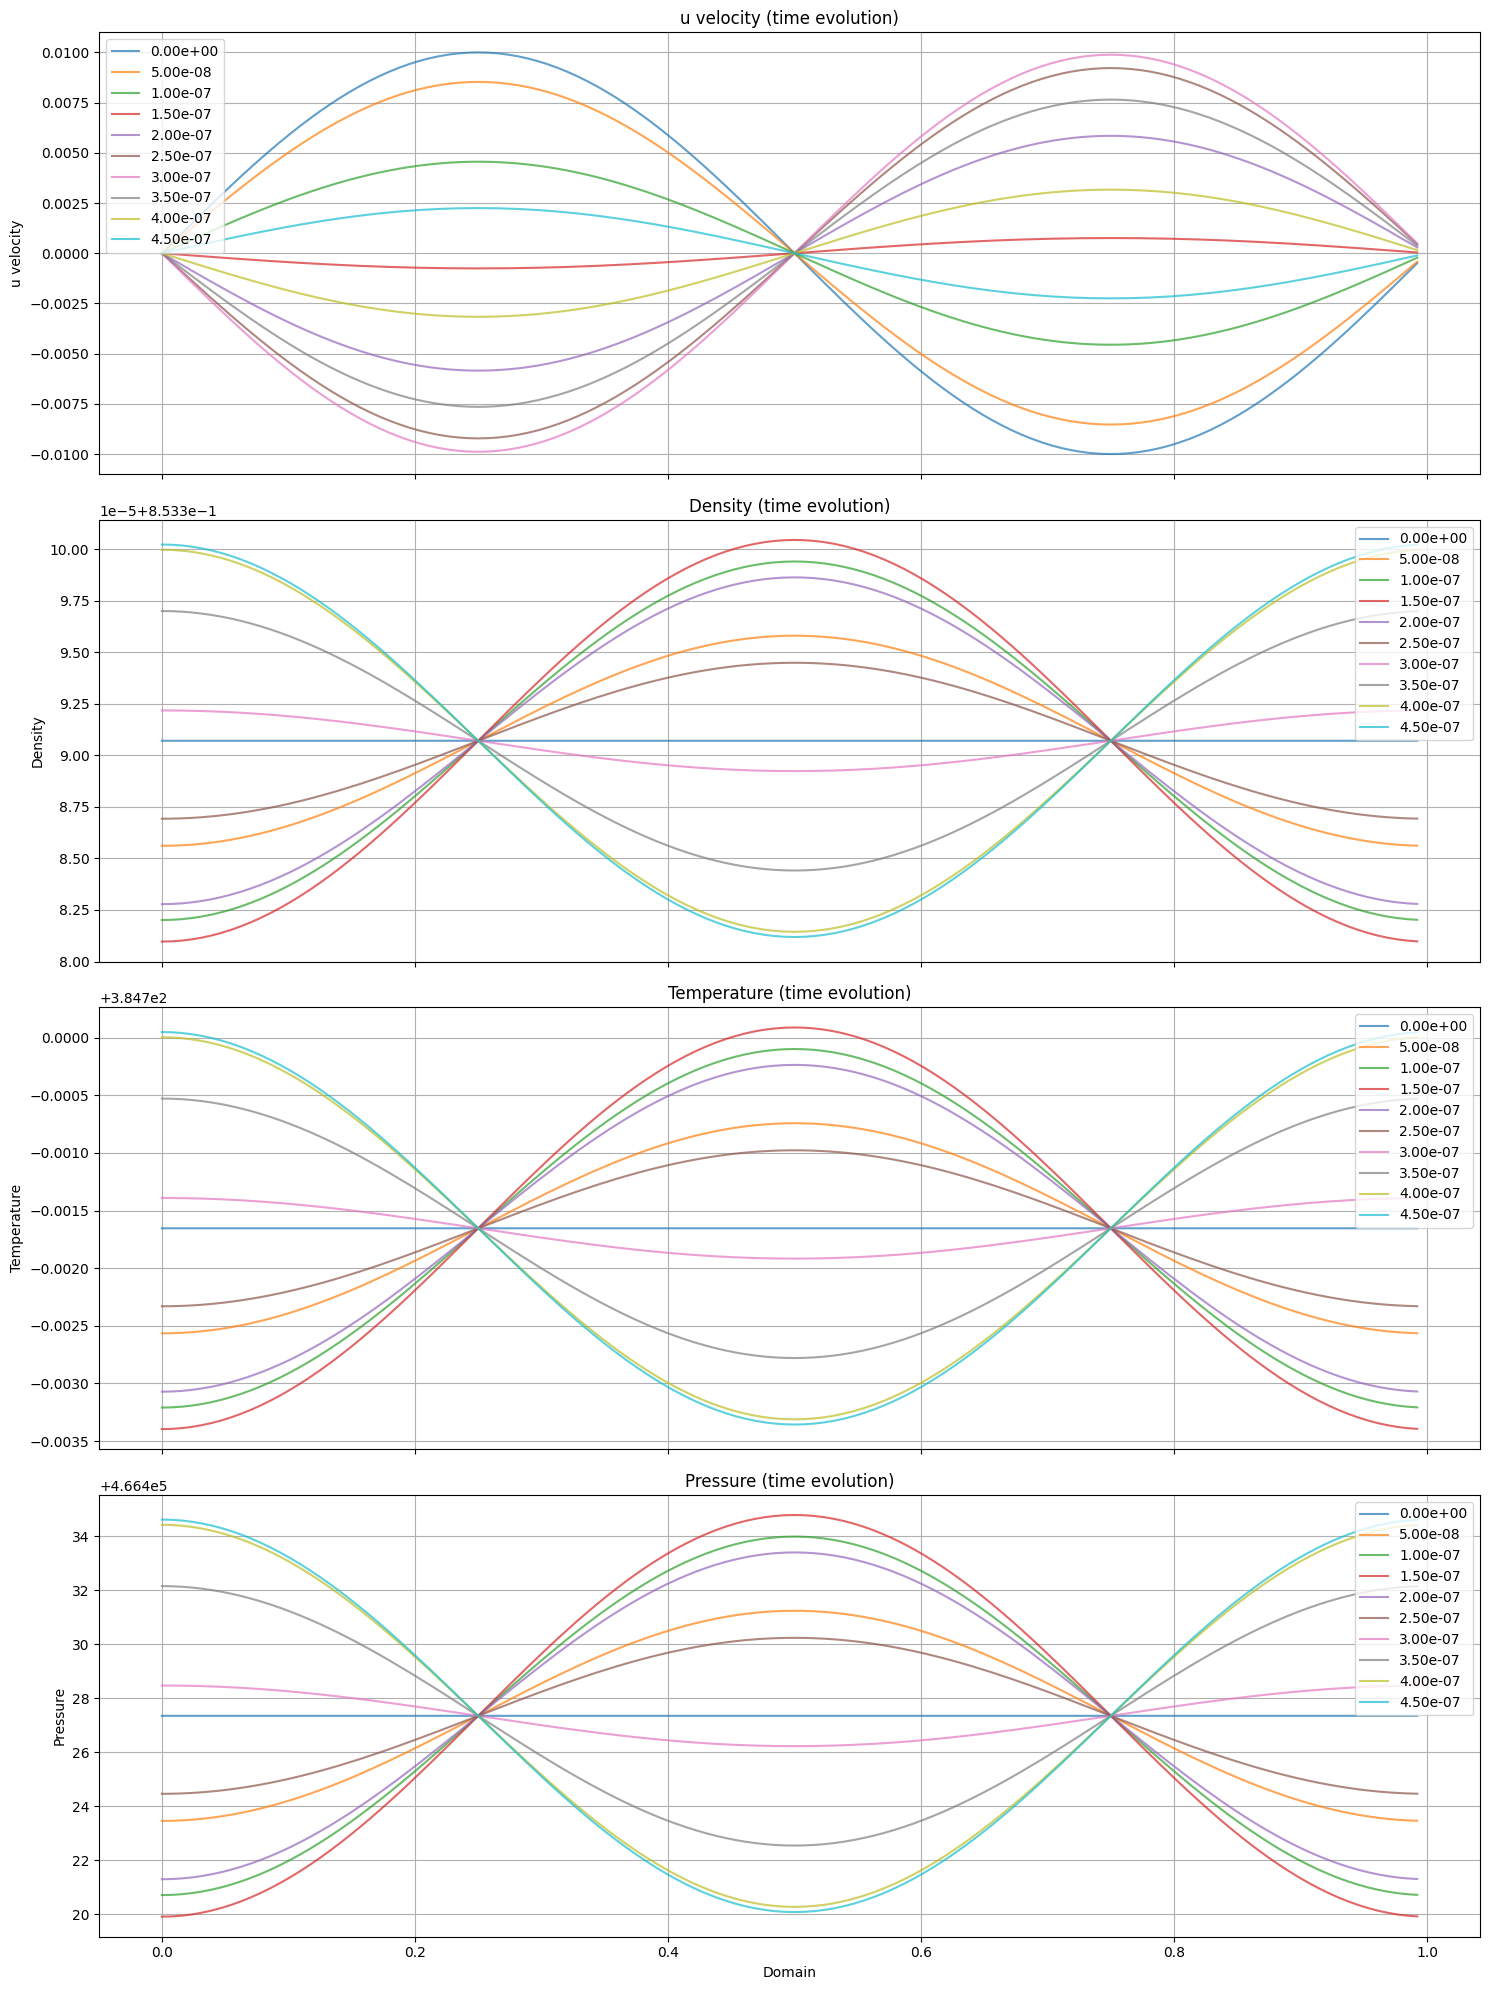

In [26]:
# Assuming x, u_vel, dens, temp, pres, and config1["Nx"] are defined as per your previous snippets
x = np.linspace(0, 1, config1["Nx"], endpoint=False)  # Adjusted to use config1["Nx"] for generality

# Create figure and subplot axes (4 rows, 1 column)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20), sharex=True)

# Data and labels for each subplot
data_vars = [u_vel, dens, temp, pres]
titles = ['u velocity (time evolution)', 'Density (time evolution)', 'Temperature (time evolution)', 'Pressure (time evolution)']
y_labels = ['u velocity', 'Density', 'Temperature', 'Pressure']

# Plot each variable in its respective subplot
for ax, data, title, ylabel in zip(axes, data_vars, titles, y_labels):
    for i in range(0, 100, 10):
        ax.plot(x, data[i, :], alpha=0.7, label=f"{i * 5e-9:.2e}")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

# Set common x-label for the bottom subplot
axes[-1].set_xlabel('Domain')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()